In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.cross_validation import train_test_split,cross_val_score

D:\Anacondainstall\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anacondainstall\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Load in the train and test datasets
horse = pd.read_csv(r'C:\Users\hezijing\Desktop\saima\horsedata\14-17race-result-horse.csv')
race = pd.read_csv(r'C:\Users\hezijing\Desktop\saima\horsedata\14-17race-result-race.csv')

In [4]:
horse

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001
5,6,9.0,WINNING ADVANTAGE,N359,A Suborics,A T Millard,123,1100,11,5-1/2,12.0,13.0,13.0,6.0,1.23.20,24,NaN,NaN,2014-001
6,7,13.0,CARE FREE ELEGANCE,P340,C Y Ho,K L Man,115,1053,12,5-1/2,4.0,3.0,3.0,7.0,1.23.22,99,NaN,NaN,2014-001
7,8,4.0,COOL PAL,S035,H W Lai,L Ho,129,1203,8,5-3/4,5.0,6.0,6.0,8.0,1.23.25,21,NaN,NaN,2014-001
8,9,6.0,TAI PO FORTUNE,P081,K Teetan,T P Yung,127,1073,6,6-1/4,7.0,7.0,7.0,9.0,1.23.33,10,NaN,NaN,2014-001
9,10,11.0,SUPER HORSE,L308,T H So,C W Chang,119,1137,7,6-3/4,11.0,11.0,12.0,10.0,1.23.41,27,NaN,NaN,2014-001


In [5]:
horse.describe()

,horse_number,running_position_1,running_position_2,running_position_3,running_position_4,running_position_5,running_position_6
count,29851.000000,29574.000000,29560.000000,29542.000000,16618.000000,3764.000000,549.000000
mean,6.885397,6.833942,6.831326,6.826992,6.942472,6.764612,6.324226
std,3.751176,3.727267,3.725933,3.724886,3.798080,3.715910,3.460488
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
max,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000


In [6]:
horse.describe(include=['O'])

,finishing_position,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,finish_time,win_odds,race_id
count,30187,30189,30189,30189,30189,30189,30189,30189,30189,30189,30189,30189
unique,36,2162,2162,106,95,32,399,16,217,4175,181,2367
top,1,SWEET BEAN,S205,J Moreira,A S Cruz,126,1088,3,-,---,99,2015-386
freq,2361,51,51,1995,1751,2057,229,2363,2451,669,3368,16


In [7]:
horse[horse['horse_name'] == 'SWEET BEAN']

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
288,14,1.0,SWEET BEAN,S205,C Reith,C Fownes,133,1013,6,7-1/2,13.0,11.0,12.0,14.0,1.23.90,67,NaN,NaN,2014-022
496,11,3.0,SWEET BEAN,S205,B Prebble,C Fownes,133,1009,10,5,5.0,5.0,6.0,11.0,1.37.40,24,NaN,NaN,2014-040
1063,7,5.0,SWEET BEAN,S205,Z Purton,C Fownes,130,989,6,5,4.0,5.0,8.0,7.0,1.40.73,47,NaN,NaN,2014-087
1658,13,8.0,SWEET BEAN,S205,C K Tong,C Fownes,127,1003,12,12,1.0,1.0,2.0,13.0,1.37.97,72,NaN,NaN,2014-133
1867,6,5.0,SWEET BEAN,S205,G Mosse,C Fownes,129,990,7,5-3/4,7.0,8.0,7.0,7.0,2.21.10,14,8.0,6.0,2014-150
3482,7,10.0,SWEET BEAN,S205,C Y Ho,C Fownes,120,1010,13,5-1/2,13.0,14.0,14.0,7.0,1.23.69,31,NaN,NaN,2014-274
4089,9,11.0,SWEET BEAN,S205,C Y Ho,C Fownes,117,1012,13,4-1/4,11.0,13.0,13.0,9.0,1.24.16,79,NaN,NaN,2014-322
4268,10,12.0,SWEET BEAN,S205,C Y Ho,C Fownes,115,1000,14,4-3/4,14.0,14.0,14.0,10.0,1.40.32,46,NaN,NaN,2014-337
5335,5,13.0,SWEET BEAN,S205,C Y Ho,C Fownes,114,997,3,3,2.0,4.0,3.0,4.0,2.04.41,19,5.0,NaN,2014-421
5706,1,10.0,SWEET BEAN,S205,J Moreira,C Fownes,115,975,2,-,4.0,5.0,5.0,6.0,1.51.74,3.8,1.0,NaN,2014-450


In [8]:
race

,src,race_date,race_course,race_number,race_id,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,20140914-10.html,2014-09-14,Sha Tin,10,2014-010,Class 2,1400,GOOD TO FIRM,COTTON TREE HANDICAP,"TURF - ""A"" COURSE",13.55 22.25 22.89 22.85,\n SMART MAN was slow to begin....
2,20140914-2.html,2014-09-14,Sha Tin,2,2014-002,Class 5,1200,GOOD TO FIRM,TIM MEI HANDICAP,"TURF - ""A"" COURSE",24.06 22.25 23.66,\n ALLEY-OOP and FLYING KEEPER ...
3,20140914-3.html,2014-09-14,Sha Tin,3,2014-003,Class 1,1200,GOOD TO FIRM,THE HKSAR CHIEF EXECUTIVE'S CUP (HANDICAP),"TURF - ""A"" COURSE",23.42 22.48 22.47,"\n On arrival at the Start, it ..."
4,20140914-4.html,2014-09-14,Sha Tin,4,2014-004,Class 4,1200,GOOD TO FIRM,LUNG WUI HANDICAP,"TURF - ""A"" COURSE",24.00 22.62 22.64,\n Just prior to the start bein...
5,20140914-5.html,2014-09-14,Sha Tin,5,2014-005,Class 4,1000,GOOD TO FIRM,HARCOURT HANDICAP,"TURF - ""A"" COURSE",13.00 20.42 22.94,"\n As the start was effected, I..."
6,20140914-6.html,2014-09-14,Sha Tin,6,2014-006,Class 3,1400,GOOD TO FIRM,GARDEN ROAD HANDICAP,"TURF - ""A"" COURSE",13.28 21.84 23.84 23.20,"\n Approaching the 800 Metres, ..."
7,20140914-7.html,2014-09-14,Sha Tin,7,2014-007,Class 4,1400,GOOD TO FIRM,TAMAR HANDICAP,"TURF - ""A"" COURSE",13.75 22.11 23.99 23.09,\n CULTURAL CITY and HAPPY ROCK...
8,20140914-8.html,2014-09-14,Sha Tin,8,2014-008,Class 3,1200,GOOD TO FIRM,DRAKE HANDICAP,"TURF - ""A"" COURSE",24.03 22.22 22.65,\n MULTIEXPRESS was withdrawn o...
9,20140914-9.html,2014-09-14,Sha Tin,9,2014-009,Class 2,1000,GOOD TO FIRM,ALBERT HANDICAP,"TURF - ""A"" COURSE",13.09 20.61 22.09,\n MY LITTLE FRIEND began awkwa...


In [9]:
race.describe(include=['O'])

,src,race_date,race_course,race_id,race_class,track_condition,race_name,track,sectional_time,incident_report
count,2367,2367,2367,2367,2367,2367,2367,2367,2367,2367
unique,2367,254,2,2367,16,9,1084,7,2367,2367
top,20151101-4.html,2014-12-07,Sha Tin,2015-773,Class 4,GOOD,SATURN HANDICAP,"TURF - ""A"" COURSE",23.62 23.07 23.37,"\n In the Parade Ring, BRIGHT S..."
freq,1,11,1513,1,859,1296,6,520,1,1


In [10]:
race.drop_duplicates(subset=['race_id','race_distance']).ix[:,('race_id','race_distance')].sort_index(by=['race_id']) 

D:\Anacondainstall\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anacondainstall\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,race_id,race_distance
0,2014-001,1400
2,2014-002,1200
3,2014-003,1200
4,2014-004,1200
5,2014-005,1000
6,2014-006,1400
7,2014-007,1400
8,2014-008,1200
9,2014-009,1000
1,2014-010,1400


In [11]:
all = pd.merge(horse, race, left_on='race_id', right_on='race_id')

In [12]:
all.columns

Index(['finishing_position', 'horse_number', 'horse_name', 'horse_id',
       'jockey', 'trainer', 'actual_weight', 'declared_horse_weight', 'draw',
       'length_behind_winner', 'running_position_1', 'running_position_2',
       'running_position_3', 'running_position_4', 'finish_time', 'win_odds',
       'running_position_5', 'running_position_6', 'race_id', 'src',
       'race_date', 'race_course', 'race_number', 'race_class',
       'race_distance', 'track_condition', 'race_name', 'track',
       'sectional_time', 'incident_report'],
      dtype='object')

In [13]:
all.drop_duplicates(subset=['trainer','horse_id']).ix[:,('trainer','horse_id')].sort_index(by=['trainer'])

D:\Anacondainstall\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anacondainstall\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,trainer,horse_id
23214,A Bull,A618
13129,A Fabre,V610
2964,A Fabre,T615
23268,A Fabre,A612
9582,A Lee,S035
23691,A Lee,S349
1276,A Lee,P110
9876,A Lee,T202
10086,A Lee,S287
23158,A Lee,A024


In [14]:
all.drop_duplicates(subset=['finishing_position']).ix[:,('finishing_position')]

D:\Anacondainstall\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13        WV-A
27          14
120         WV
297       9 DH
592       2 DH
623         WX
680         PU
752       1 DH
1260      8 DH
1413        UR
1618        FE
1701      4 DH
2313     10 DH
3232       TNP
3616      5 DH
4456      DISQ
4977     11 DH
5839     12 DH
6065      3 DH
6641      7 DH
7281      WX-A
7557       DNF
9120      6 DH
11053      NaN
Name: finishing_position, dtype: object

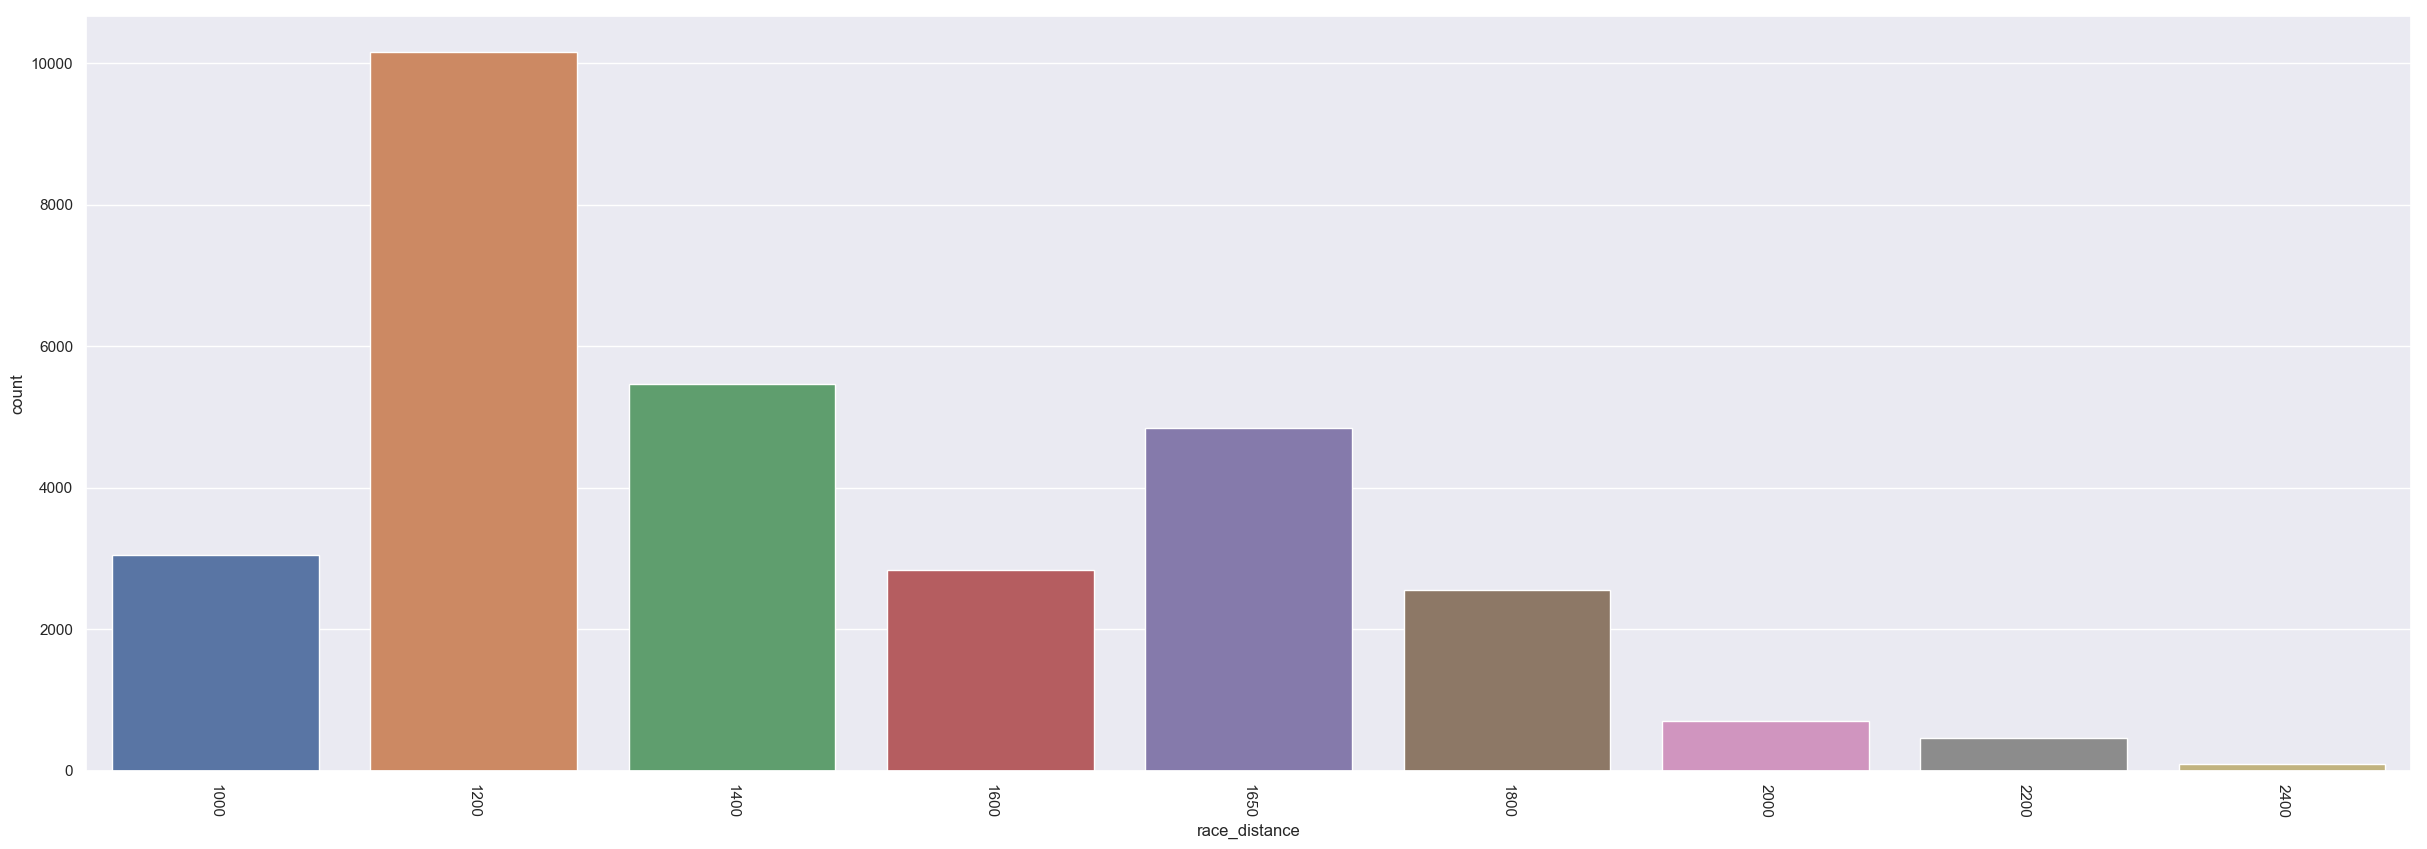

In [15]:
sns.set(style="darkgrid")
f, ax=plt.subplots(figsize=(30,10),dpi=100) #30,10的画布 分辨率100
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90) #旋转x轴字体方向
ax = sns.countplot(x="race_distance", data=all)

In [16]:
def tran_fin(x):
    y=0
    x=str(x)
    if x.isdigit()!=True:
        y=5
    else:
        x=int(x)
        if(x>=1 and x<=3):
            y=1
        elif(x>= 4 and x<=6):
            y=2
        elif(x>=7 and x<=9):
            y=3
        elif(x>=10):
            y=4
        else:
            y=5
    return y

In [17]:
#完成比赛分类 一类1-3 二类4-6 三类7-9 四类10-14 五类异常 
all['finishing_position']=all['finishing_position'].apply(tran_fin)

In [18]:
pd_jockeytimes = pd.DataFrame({'jockey_times': all.groupby('jockey')['horse_id'].count()})
pd_jockeytimes['jockey']=list(all.groupby('jockey')['horse_id'].count().index)

In [19]:
all=pd.merge(all, pd_jockeytimes, on='jockey', how='left')

D:\Anacondainstall\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 'jockey' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
all['finish_time']

0        1.22.33
1        1.22.65
2        1.22.66
3        1.22.66
4        1.23.02
5        1.23.20
6        1.23.22
7        1.23.25
8        1.23.33
9        1.23.41
10       1.23.56
11       1.23.96
12       1.24.10
13           ---
14       1.21.54
15       1.21.89
16       1.21.92
17       1.21.95
18       1.21.98
19       1.22.10
20       1.22.10
21       1.22.18
22       1.22.25
23       1.22.32
24       1.22.34
25       1.22.72
26       1.22.98
27       1.23.26
28       1.09.97
29       1.10.17
          ...   
30159    1.37.08
30160    1.37.27
30161    1.37.42
30162    1.37.50
30163    1.37.61
30164    1.41.03
30165        ---
30166    1.35.39
30167    1.35.67
30168    1.35.94
30169    1.36.00
30170    1.36.06
30171    1.36.38
30172    1.36.40
30173    1.37.80
30174    1.23.09
30175    1.23.36
30176    1.23.51
30177    1.23.74
30178    1.23.74
30179    1.23.76
30180    1.23.79
30181    1.23.98
30182    1.24.05
30183    1.24.18
30184    1.24.58
30185    1.25.26
30186    1.25.

In [21]:
all.loc[ all['jockey_times'] <= 250, 'jockey_times_ca'] = 1
all.loc[(all['jockey_times'] > 250) & (all['jockey_times'] <= 500), 'jockey_times_ca'] = 2
all.loc[(all['jockey_times'] > 500) & (all['jockey_times'] <= 750), 'jockey_times_ca']  = 3
all.loc[ all['jockey_times'] > 750, 'jockey_times_ca']  = 4
all['jockey_times_ca'] = all['jockey_times_ca'].astype(int)

In [22]:
horse_dem = pd.DataFrame({'horse_times': all.groupby('horse_id')['horse_id'].count()})

D:\Anacondainstall\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


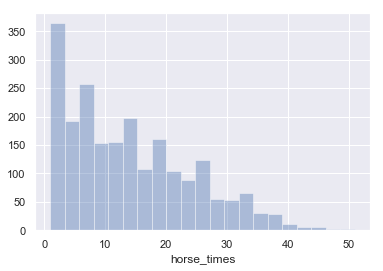

In [23]:
sns.distplot(horse_dem['horse_times'], kde=False)

In [24]:
horse_dem.loc[horse_dem['horse_times'] <=10 ,'horse_times_ca']=1
horse_dem.loc[(horse_dem['horse_times'] >10) & (horse_dem['horse_times'] <= 20) ,'horse_times_ca']=2
horse_dem.loc[(horse_dem['horse_times'] >20) & (horse_dem['horse_times'] <= 30) ,'horse_times_ca']=3
horse_dem.loc[(horse_dem['horse_times'] >30) ,'horse_times_ca']=4
horse_dem['horse_times_ca'] = horse_dem['horse_times_ca'].astype(int)

In [25]:
horse_position = pd.DataFrame({'horse_position_ca_times':all.groupby(['horse_id','finishing_position'])['horse_id'].count()})                           

In [26]:
horse_position=horse_position.reset_index()

In [27]:
pd1 = pd.DataFrame({'horse_id':horse_position.drop_duplicates(subset=['horse_id'])['horse_id']})
pd2 = pd.DataFrame({'finishing_position':[1,2,3,4,5]})
pd1['value'] = 1
pd2['value'] = 1
pd3=pd.merge(pd1,pd2,how='left',on='value')
del pd3['value']

In [28]:
horse_position = pd.merge(pd3,horse_position,how='left',on=['horse_id','finishing_position'])

In [29]:
horse_position=horse_position.fillna(0)
horse_position['horse_position_ca_times']=horse_position['horse_position_ca_times'].astype(int)

In [30]:
horse_times=pd.DataFrame({'horse_times':horse_position.groupby('horse_id')['horse_position_ca_times'].sum()})
horse_times=horse_times.reset_index()
horse_position = pd.merge(horse_position,horse_times,how='left',on='horse_id')

In [31]:
horse_position['position_rate']=horse_position['horse_position_ca_times']/horse_position['horse_times']

In [32]:
def tran_finish_time(x):
    try:
        [a,b,c]=x.split(".")
        a=int(a)
        b=int(b)
        c=int(c)
        return (a*60*100+b*100+c)
    except:
        return 0

D:\Anacondainstall\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


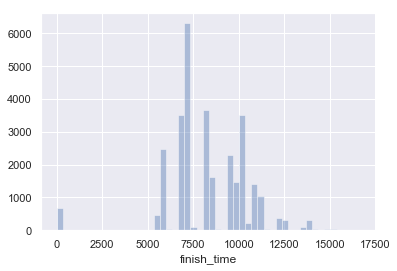

In [33]:
sns.distplot(all['finish_time'].apply(lambda x:tran_finish_time(x)), kde=False)

In [34]:
for i in all.loc[:,['actual_weight']].values:
    try:
        int(i)
    except:
        print(i)

['-']
['-']


In [35]:
all.loc[:,['actual_weight']]
weight=all.loc[(all['actual_weight']!=0) & (all['declared_horse_weight']!=0) &  (all['actual_weight']!='-') &  (all['declared_horse_weight']!='-'),['horse_id','actual_weight','declared_horse_weight']]
weight = weight.groupby('horse_id')['actual_weight','declared_horse_weight'].agg([max,min])

In [36]:
horse_position = pd.merge(horse_position,weight,how='left',on='horse_id')

D:\Anacondainstall\envs\py36\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [37]:
horse_position.columns = ['horse_id', 'finishing_position', 'horse_position_ca_times', 'horse_times', 'position_rate','act_max','act_min','del_max','del_min']

In [38]:
horse_position['act_max']=horse_position['act_max'].astype(int)
horse_position['act_min']=horse_position['act_min'].astype(int)
horse_position['del_max']=horse_position['del_max'].astype(int)
horse_position['del_min']=horse_position['del_min'].astype(int)

In [39]:
horse_position['len_act']=horse_position['act_max']-horse_position['act_min']
horse_position['len_del']=horse_position['del_max']-horse_position['del_min']

In [40]:
horse_position=pd.merge(horse_position,horse_dem,how='left',on='horse_id')

In [41]:
horse_position.drop(['horse_times_x','horse_times_y'],axis=1)

,horse_id,finishing_position,horse_position_ca_times,position_rate,act_max,act_min,del_max,del_min,len_act,len_del,horse_times_ca
0,A001,1,0,0.000000,125,124,1083,1054,1,29,1
1,A001,2,1,0.333333,125,124,1083,1054,1,29,1
2,A001,3,0,0.000000,125,124,1083,1054,1,29,1
3,A001,4,2,0.666667,125,124,1083,1054,1,29,1
4,A001,5,0,0.000000,125,124,1083,1054,1,29,1
5,A002,1,5,0.416667,133,115,1101,1052,18,49,2
6,A002,2,3,0.250000,133,115,1101,1052,18,49,2
7,A002,3,3,0.250000,133,115,1101,1052,18,49,2
8,A002,4,1,0.083333,133,115,1101,1052,18,49,2
9,A002,5,0,0.000000,133,115,1101,1052,18,49,2


In [42]:
jockey = pd.DataFrame({'jockey':all.drop_duplicates(subset=['jockey'])['jockey']})
pd2 = pd.DataFrame({'finishing_position':[1,2,3,4,5]})
jockey['value'] = 1
pd2['value'] = 1
jockey=pd.merge(jockey,pd2,how='left',on='value')
del jockey['value']

In [43]:
jockey_pos_times=pd.DataFrame({'jockey_times':all.groupby(['jockey','finishing_position'])['jockey'].count()})

In [44]:
jockey_pos_times=jockey_pos_times.reset_index()

In [45]:
jockey_pos_times['jockey_times']=jockey_pos_times['jockey_times'].astype(int)

In [46]:
jockey_pos_times=pd.merge(jockey,jockey_pos_times,how='left',on=['jockey','finishing_position'])

In [47]:
jockey_pos_times=jockey_pos_times.fillna(0)

In [48]:
jockey_pos_times['jockey_times']=jockey_pos_times['jockey_times'].astype(int)

In [49]:
total_times=pd.DataFrame({'total_times':jockey_pos_times.groupby('jockey')['jockey_times'].sum()})

In [50]:
jockey_pos_times=pd.merge(jockey_pos_times,total_times,how='left',on='jockey')

In [51]:
jockey_times_ca=all.loc[:,['jockey','jockey_times_ca']]

In [52]:
jockey_times_ca=jockey_times_ca.drop_duplicates(subset=['jockey','jockey_times_ca'])

In [53]:
jockey_pos_times['jockey_pos_rate']=jockey_pos_times['jockey_times']/jockey_pos_times['total_times']

In [54]:
jockey_pos_times=pd.merge(jockey_pos_times,jockey_times_ca,how='left',on='jockey')

In [55]:
jockey_pos_times

,jockey,finishing_position,jockey_times,total_times,jockey_pos_rate,jockey_times_ca
0,B Prebble,1,411,1382,0.297395,4
1,B Prebble,2,346,1382,0.250362,4
2,B Prebble,3,286,1382,0.206946,4
3,B Prebble,4,305,1382,0.220695,4
4,B Prebble,5,34,1382,0.024602,4
5,D Whyte,1,457,1608,0.284204,4
6,D Whyte,2,449,1608,0.279229,4
7,D Whyte,3,391,1608,0.243159,4
8,D Whyte,4,271,1608,0.168532,4
9,D Whyte,5,40,1608,0.024876,4


In [56]:
trainer_times=pd.DataFrame({'trainer_times':all.loc[:,['trainer','finishing_position','horse_id']].groupby('trainer')['horse_id'].count()})
trainer_horses=pd.DataFrame({'trainer_horses':all.loc[:,['trainer','finishing_position','horse_id']].drop_duplicates(subset=['trainer','horse_id']).loc[:,['trainer','horse_id']].groupby('trainer')['horse_id'].count()})
greatjob_times=pd.DataFrame({'greatjob_times':all.loc[(all['finishing_position']==1) | (all['finishing_position']==2),['trainer','finishing_position']].groupby('trainer')['finishing_position'].count()})

In [57]:
all.loc[:,['trainer','finishing_position','horse_id']].groupby('trainer')['horse_id'].count()

trainer
A Bull               1
A Fabre              4
A Lee             1182
A P O'Brien          4
A S Cruz          1751
A Schutz           496
A T Millard       1349
A de Watrigant       1
Barande-Barbe        3
C Appleby            1
C Clement            1
C Fownes          1724
C H Yip           1692
C S Shum          1466
C W Chang         1136
C Waller             1
D A Hayes            4
D Cruz            1012
D E Ferraris      1251
D J Hall          1090
D K Weld             1
D O'Meara            1
D Simcock            1
E A L Dunlop         2
E M Lynam            2
E Mader              1
Ed Walker            1
F Head               1
F Rohaut             1
G Allendorf          2
                  ... 
P F Yiu           1410
P O'Sullivan      1195
P Schiergen          1
Pat Lee              1
R Charlton           1
R Fahey              1
R Gibson          1103
R Hannon             1
R Heathcote          2
R Hickmott           1
R Okubo              1
R Varian             1
S C

In [58]:
trainer=pd.merge(trainer_times,trainer_horses,how='left',on='trainer')

In [59]:
trainer=pd.merge(trainer,greatjob_times,how='left',on='trainer')

In [60]:
trainer=trainer.fillna(0)
trainer['greatjob_times']=trainer['greatjob_times'].astype(int)

In [61]:
trainer

,trainer_times,trainer_horses,greatjob_times
trainer,,,
A Bull,1,1,1
A Fabre,4,3,3
A Lee,1182,94,484
A P O'Brien,4,2,2
A S Cruz,1751,125,894
A Schutz,496,46,176
A T Millard,1349,105,670
A de Watrigant,1,1,0
Barande-Barbe,3,2,1


## Build Training Data Set

In [62]:
horse_fetures= horse_position.loc[:,['horse_id','act_max','act_min','del_max','del_min','len_act','len_del','horse_times_ca']].drop_duplicates(subset=['horse_id','act_max','act_min','del_max','del_min','len_act','len_del','horse_times_ca'])

In [63]:
horse_fetures=horse_fetures.reset_index()
horse_fetures['p1_rate']= horse_position.loc[horse_position['finishing_position']==1,['horse_id','position_rate']].reset_index()['position_rate']
horse_fetures['p2_rate']= horse_position.loc[horse_position['finishing_position']==2,['horse_id','position_rate']].reset_index()['position_rate']
horse_fetures['p3_rate']= horse_position.loc[horse_position['finishing_position']==3,['horse_id','position_rate']].reset_index()['position_rate']
horse_fetures['p4_rate']= horse_position.loc[horse_position['finishing_position']==4,['horse_id','position_rate']].reset_index()['position_rate']
horse_fetures['p5_rate']= horse_position.loc[horse_position['finishing_position']==5,['horse_id','position_rate']].reset_index()['position_rate']
del horse_fetures['index']

In [64]:
horse_fetures

,horse_id,act_max,act_min,del_max,del_min,len_act,len_del,horse_times_ca,p1_rate,p2_rate,p3_rate,p4_rate,p5_rate
0,A001,125,124,1083,1054,1,29,1,0.000000,0.333333,0.000000,0.666667,0.000000
1,A002,133,115,1101,1052,18,49,2,0.416667,0.250000,0.250000,0.083333,0.000000
2,A003,132,115,1173,1123,17,50,1,0.125000,0.125000,0.625000,0.125000,0.000000
3,A004,133,114,1099,1070,19,29,1,0.000000,0.222222,0.333333,0.444444,0.000000
4,A005,133,113,1137,1117,20,20,1,0.125000,0.125000,0.375000,0.375000,0.000000
5,A006,130,115,1149,1143,15,6,1,0.500000,0.000000,0.500000,0.000000,0.000000
6,A007,131,115,1051,1015,16,36,1,0.200000,0.500000,0.200000,0.100000,0.000000
7,A008,133,114,1090,1057,19,33,2,0.692308,0.153846,0.153846,0.000000,0.000000
8,A009,131,115,1135,1110,16,25,1,0.777778,0.222222,0.000000,0.000000,0.000000
9,A010,129,118,1184,1167,11,17,1,0.125000,0.250000,0.375000,0.125000,0.125000


In [65]:
jockey_pos_times

,jockey,finishing_position,jockey_times,total_times,jockey_pos_rate,jockey_times_ca
0,B Prebble,1,411,1382,0.297395,4
1,B Prebble,2,346,1382,0.250362,4
2,B Prebble,3,286,1382,0.206946,4
3,B Prebble,4,305,1382,0.220695,4
4,B Prebble,5,34,1382,0.024602,4
5,D Whyte,1,457,1608,0.284204,4
6,D Whyte,2,449,1608,0.279229,4
7,D Whyte,3,391,1608,0.243159,4
8,D Whyte,4,271,1608,0.168532,4
9,D Whyte,5,40,1608,0.024876,4


In [66]:
jockey_features=jockey_pos_times.loc[:,['jockey','jockey_times_ca']].drop_duplicates(subset=['jockey','jockey_times_ca']).reset_index()
del jockey_features['index']

In [67]:
jockey_features['j1_rate'] = jockey_pos_times.loc[jockey_pos_times['finishing_position']==1,['jockey','jockey_pos_rate']].reset_index()['jockey_pos_rate']
jockey_features['j2_rate'] = jockey_pos_times.loc[jockey_pos_times['finishing_position']==2,['jockey','jockey_pos_rate']].reset_index()['jockey_pos_rate']
jockey_features['j3_rate'] = jockey_pos_times.loc[jockey_pos_times['finishing_position']==3,['jockey','jockey_pos_rate']].reset_index()['jockey_pos_rate']
jockey_features['j4_rate'] = jockey_pos_times.loc[jockey_pos_times['finishing_position']==4,['jockey','jockey_pos_rate']].reset_index()['jockey_pos_rate']
jockey_features['j5_rate'] = jockey_pos_times.loc[jockey_pos_times['finishing_position']==5,['jockey','jockey_pos_rate']].reset_index()['jockey_pos_rate']

In [68]:
jockey_features

,jockey,jockey_times_ca,j1_rate,j2_rate,j3_rate,j4_rate,j5_rate
0,B Prebble,4,0.297395,0.250362,0.206946,0.220695,0.024602
1,D Whyte,4,0.284204,0.279229,0.243159,0.168532,0.024876
2,Y T Cheng,3,0.152235,0.206704,0.236034,0.377095,0.027933
3,J Moreira,4,0.513283,0.246115,0.124812,0.092231,0.023559
4,Z Purton,4,0.401575,0.241672,0.182919,0.149606,0.024228
5,A Suborics,2,0.157895,0.210526,0.226316,0.360526,0.044737
6,C Y Ho,4,0.154646,0.233268,0.261209,0.319688,0.031189
7,H W Lai,4,0.128028,0.211073,0.262111,0.374567,0.024221
8,K Teetan,4,0.231687,0.256672,0.250426,0.229415,0.031800
9,T H So,4,0.123692,0.181732,0.238820,0.431970,0.023787


In [69]:
trainer_features = trainer
trainer_features=trainer_features.reset_index()

In [70]:
all = all.loc[:,['race_id','horse_id','jockey','trainer','actual_weight','declared_horse_weight','draw','race_class','race_distance','track_condition','track','length_behind_winner','finishing_position']]

In [71]:
all.loc[(all['race_class']=='Class 5') | (all['race_class']=='Restricted Race') | (all['race_class']=='Griffin Race') ,'race_class'] = 5
all.loc[(all['race_class']=='Class 4')| (all['race_class']=='Class 4 (Restricted)') | (all['race_class']=='Class 4 (Special Condition)') ,'race_class'] = 4
all.loc[(all['race_class']=='Class 3') | (all['race_class']=='Class 3 (Special Condition)') | (all['race_class']=='Hong Kong Group Three') | (all['race_class']=='Group Three') ,'race_class'] = 3
all.loc[(all['race_class']=='Class 2') | (all['race_class']=='Hong Kong Group Two') | (all['race_class']=='Group Two'),'race_class'] = 2
all.loc[(all['race_class']=='Class 1') | (all['race_class']=='Hong Kong Group One') | (all['race_class']=='Group One'),'race_class'] = 1

In [72]:
all.loc[(all['race_distance']==1000) |  (all['race_distance']==1200) ,'race_distance'] = 1
all.loc[(all['race_distance']==1400) |  (all['race_distance']==1600) | (all['race_distance']==1650),'race_distance'] = 2
all.loc[(all['race_distance']==1800) |  (all['race_distance']==2000) | (all['race_distance']==2200) | (all['race_distance']==2400),'race_distance'] = 3

In [73]:
all.loc[(all['track_condition']=='GOOD TO FIRM') | (all['track_condition']=='WET FAST') | (all['track_condition']=='GOOD') |  (all['track_condition']=='FAST')  ,'track_condition'] = 1
all.loc[(all['track_condition']=='GOOD TO YIELDING') | (all['track_condition']=='WET SLOW') | (all['track_condition']=='YIELDING') |(all['track_condition']=='YIELDING TO SOFT') | (all['track_condition']=='SOFT') ,'track_condition'] = 2

In [74]:
all.loc[(all['track']=='TURF - "A" COURSE') | (all['track']=='TURF - "A+3" COURSE') |  (all['track']=='ALL WEATHER TRACK') ,'track'] = 1
all.loc[(all['track']=='TURF - "B+2" COURSE') | (all['track']=='TURF - "B" COURSE')  ,'track'] = 2
all.loc[(all['track']=='TURF - "C" COURSE') | (all['track']=='TURF - "C+3" COURSE')  ,'track'] = 3

In [75]:
def tran_length(x):
    try:
        [a,b]=x.split('-')
        [c,d]=b.split('/')
        return (int(a)+int(c)/int(d))  
    except:
        try:
            [a,b]=x.split('/')
            return (int(a)/int(b))
        except:
            return (int(x))

In [76]:
all.loc[(all['finishing_position']==1) & (all['length_behind_winner']=='-'),'length_behind_winner']=0
all.loc[(all['length_behind_winner']=='---') | (all['length_behind_winner']=='N') | (all['length_behind_winner']=='+SH') | (all['length_behind_winner']=='TO') | (all['length_behind_winner']=='SH') | (all['length_behind_winner']=='HD')| ((all['finishing_position']!=1) & (all['length_behind_winner']=='-')) | (all['length_behind_winner']=='NOSE') |(all['length_behind_winner']=='+NOSE') | (all['length_behind_winner']=='ML'),'length_behind_winner']=15
all['target']=all['length_behind_winner'].apply(lambda x: tran_length(x))

In [77]:
all

,race_id,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,race_class,race_distance,track_condition,track,length_behind_winner,finishing_position,target
0,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,1,0,1,0.00
1,2014-001,S070,D Whyte,D E Ferraris,133,1075,13,5,2,1,1,2,1,2.00
2,2014-001,P072,Y T Cheng,Y S Tsui,121,1065,3,5,2,1,1,2,1,2.00
3,2014-001,P230,J Moreira,C S Shum,132,1222,2,5,2,1,1,2,2,2.00
4,2014-001,H173,Z Purton,K W Lui,125,1136,9,5,2,1,1,4-1/4,2,4.25
5,2014-001,N359,A Suborics,A T Millard,123,1100,11,5,2,1,1,5-1/2,2,5.50
6,2014-001,P340,C Y Ho,K L Man,115,1053,12,5,2,1,1,5-1/2,3,5.50
7,2014-001,S035,H W Lai,L Ho,129,1203,8,5,2,1,1,5-3/4,3,5.75
8,2014-001,P081,K Teetan,T P Yung,127,1073,6,5,2,1,1,6-1/4,3,6.25
9,2014-001,L308,T H So,C W Chang,119,1137,7,5,2,1,1,6-3/4,4,6.75


In [78]:
row=all.loc[:,['race_id','horse_id']].drop_duplicates(subset=['race_id','horse_id'])

In [79]:
training_total = pd.merge(row,row,how='left',on='race_id')

In [80]:
training_total=training_total.loc[training_total['horse_id_x']!=training_total['horse_id_y'],['race_id','horse_id_x','horse_id_y']]

In [81]:
training_total=pd.merge(training_total,all,how='left',left_on=['race_id','horse_id_x'],right_on=['race_id','horse_id'])

In [82]:
del training_total['length_behind_winner']
#del training_total['finishing_position']

In [83]:
training_total.columns=['race_id','horse_id_x','horse_id_y','horse_id_A','jockey_A','trainer_A','actual_weight_A','declared_horse_weight_A','draw_A','race_class','race_distance','track_condition','track','finishing_position','target_A']

In [84]:
training_total=pd.merge(training_total,all.loc[:,['race_id','horse_id','jockey','trainer','actual_weight','declared_horse_weight','draw','target']],how='left',left_on=['race_id','horse_id_y'],right_on=['race_id','horse_id'])

In [85]:
training_total.columns=['race_id', 'horse_id_x', 'horse_id_y', 'horse_id_A', 'jockey_A',
       'trainer_A', 'actual_weight_A', 'declared_horse_weight_A', 'draw_A',
       'race_class', 'race_distance', 'track_condition', 'track', 'finishing_position','target_A',
       'horse_id_B', 'jockey_B', 'trainer_B', 'actual_weight_B',
       'declared_horse_weight_B', 'draw_B', 'target_B']

In [86]:
#del training_total['race_id']
del training_total['horse_id_x']
del training_total['horse_id_y']

In [87]:
training_total.loc[training_total['actual_weight_A']=='-','actual_weight_A']=110
training_total.loc[training_total['actual_weight_B']=='-','actual_weight_B']=110
training_total.loc[training_total['declared_horse_weight_A']=='-','declared_horse_weight_A']=1200
training_total.loc[training_total['declared_horse_weight_B']=='-','declared_horse_weight_B']=1200

In [88]:
training_total['actual_weight']=training_total['actual_weight_A'].astype(int)-training_total['actual_weight_B'].astype(int)
training_total['declared_horse_weight']=training_total['declared_horse_weight_A'].astype(int)-training_total['declared_horse_weight_B'].astype(int)
training_total['target']=training_total['target_A']-training_total['target_B']

In [89]:
training_total

,race_id,horse_id_A,jockey_A,trainer_A,actual_weight_A,declared_horse_weight_A,draw_A,race_class,race_distance,track_condition,...,horse_id_B,jockey_B,trainer_B,actual_weight_B,declared_horse_weight_B,draw_B,target_B,actual_weight,declared_horse_weight,target
0,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,S070,D Whyte,D E Ferraris,133,1075,13,2.00,0,-43,-2.00
1,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,P072,Y T Cheng,Y S Tsui,121,1065,3,2.00,12,-33,-2.00
2,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,P230,J Moreira,C S Shum,132,1222,2,2.00,1,-190,-2.00
3,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,H173,Z Purton,K W Lui,125,1136,9,4.25,8,-104,-4.25
4,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,N359,A Suborics,A T Millard,123,1100,11,5.50,10,-68,-5.50
5,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,P340,C Y Ho,K L Man,115,1053,12,5.50,18,-21,-5.50
6,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,S035,H W Lai,L Ho,129,1203,8,5.75,4,-171,-5.75
7,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,P081,K Teetan,T P Yung,127,1073,6,6.25,6,-41,-6.25
8,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,L308,T H So,C W Chang,119,1137,7,6.75,14,-105,-6.75
9,2014-001,K019,B Prebble,D Cruz,133,1032,1,5,2,1,...,S090,K C Leung,P O'Sullivan,125,1099,4,7.75,8,-67,-7.75


D:\Anacondainstall\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


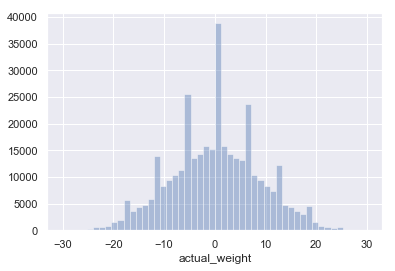

In [90]:
sns.distplot(training_total['actual_weight'], kde=False)

D:\Anacondainstall\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


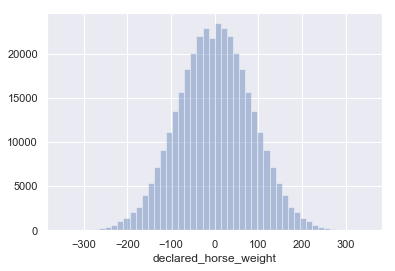

In [91]:
sns.distplot(training_total['declared_horse_weight'], kde=False)

In [92]:
training_total.loc[(training_total['actual_weight']<=-10) ,'actual_weight']=-3
training_total.loc[(training_total['actual_weight']<=-5) & (training_total['actual_weight']>-10),'actual_weight']=-2
training_total.loc[(training_total['actual_weight']<=0) & (training_total['actual_weight']>-5),'actual_weight']=-1
training_total.loc[(training_total['actual_weight']>0) & (training_total['actual_weight']<=5),'actual_weight']=1
training_total.loc[(training_total['actual_weight']>5) & (training_total['actual_weight']<=10),'actual_weight']=2
training_total.loc[(training_total['actual_weight']>10),'actual_weight']=3

In [93]:
training_total.loc[(training_total['declared_horse_weight']<=-100) ,'declared_horse_weight']=-3
training_total.loc[(training_total['declared_horse_weight']<=-50) & (training_total['declared_horse_weight']>-100),'declared_horse_weight']=-2
training_total.loc[(training_total['declared_horse_weight']<=0) & (training_total['declared_horse_weight']>-50),'declared_horse_weight']=-1
training_total.loc[(training_total['declared_horse_weight']>0) & (training_total['declared_horse_weight']<=50),'declared_horse_weight']=1
training_total.loc[(training_total['declared_horse_weight']>50) & (training_total['declared_horse_weight']<=100),'declared_horse_weight']=2
training_total.loc[(training_total['declared_horse_weight']>100),'declared_horse_weight']=3

In [94]:
training_total = pd.merge(training_total,horse_fetures.loc[:,['horse_id','horse_times_ca','p1_rate','p2_rate','p3_rate','p4_rate','p5_rate']],how='left',left_on='horse_id_A',right_on='horse_id')

In [95]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track','finishing_position', 'target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A', 'p3_rate_A',
       'p4_rate_A', 'p5_rate_A']

In [96]:
training_total = pd.merge(training_total,horse_fetures.loc[:,['horse_id','horse_times_ca','p1_rate','p2_rate','p3_rate','p4_rate','p5_rate']],how='left',left_on='horse_id_B',right_on='horse_id')

In [97]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track', 'finishing_position','target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_id_rB', 'horse_times_ca_B',
       'p1_rate_B', 'p2_rate_B', 'p3_rate_B', 'p4_rate_B', 'p5_rate_B']

In [98]:
training_total = pd.merge(training_total,jockey_features,how='left',left_on='jockey_A',right_on='jockey')

In [99]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track','finishing_position','target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_id_rB',
       'horse_times_ca_B', 'p1_rate_B', 'p2_rate_B', 'p3_rate_B', 'p4_rate_B',
       'p5_rate_B', 'jockey_rA', 'jockey_times_ca_A', 'j1_rate_A', 'j2_rate_A',
       'j3_rate_A', 'j4_rate_A', 'j5_rate_A']

In [100]:
training_total = pd.merge(training_total,jockey_features,how='left',left_on='jockey_B',right_on='jockey')

In [101]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track', 'finishing_position','target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_id_rB',
       'horse_times_ca_B', 'p1_rate_B', 'p2_rate_B', 'p3_rate_B', 'p4_rate_B',
       'p5_rate_B', 'jockey_rA', 'jockey_times_ca_A', 'j1_rate_A', 'j2_rate_A',
       'j3_rate_A', 'j4_rate_A', 'j5_rate_A', 'jockey_rB', 'jockey_times_ca_B',
       'j1_rate_B', 'j2_rate_B', 'j3_rate_B', 'j4_rate_B', 'j5_rate_B']

In [102]:
training_total = pd.merge(training_total,trainer_features,how='left',left_on='trainer_A',right_on='trainer')

In [103]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track','finishing_position', 'target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_id_rB',
       'horse_times_ca_B', 'p1_rate_B', 'p2_rate_B', 'p3_rate_B', 'p4_rate_B',
       'p5_rate_B', 'jockey_rA', 'jockey_times_ca_A', 'j1_rate_A', 'j2_rate_A',
       'j3_rate_A', 'j4_rate_A', 'j5_rate_A', 'jockey_rB', 'jockey_times_ca_B',
       'j1_rate_B', 'j2_rate_B', 'j3_rate_B', 'j4_rate_B', 'j5_rate_B',
       'trainer_rA', 'trainer_times_A', 'trainer_horses_A', 'greatjob_times_A']

In [104]:
training_total = pd.merge(training_total,trainer_features,how='left',left_on='trainer_B',right_on='trainer')

In [105]:
training_total.columns=['race_id','horse_id_A', 'jockey_A', 'trainer_A', 'actual_weight_A',
       'declared_horse_weight_A', 'draw_A', 'race_class', 'race_distance',
       'track_condition', 'track', 'finishing_position','target_A', 'horse_id_B', 'jockey_B',
       'trainer_B', 'actual_weight_B', 'declared_horse_weight_B', 'draw_B',
       'target_B', 'actual_weight', 'declared_horse_weight', 'target',
       'horse_id_rA', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_id_rB',
       'horse_times_ca_B', 'p1_rate_B', 'p2_rate_B', 'p3_rate_B', 'p4_rate_B',
       'p5_rate_B', 'jockey_rA', 'jockey_times_ca_A', 'j1_rate_A', 'j2_rate_A',
       'j3_rate_A', 'j4_rate_A', 'j5_rate_A', 'jockey_rB', 'jockey_times_ca_B',
       'j1_rate_B', 'j2_rate_B', 'j3_rate_B', 'j4_rate_B', 'j5_rate_B',
       'trainer_rA', 'trainer_times_A', 'trainer_horses_A', 'greatjob_times_A',
       'trainer_rB', 'trainer_times_B', 'trainer_horses_B', 'greatjob_times_B']

In [106]:
training_total.loc[(training_total['target']<=0) ,'rtarget']=0
training_total.loc[(training_total['target']>0) ,'rtarget']=1
training_total['rtarget']=training_total['rtarget'].astype("int").astype("category")

In [107]:
training_total=training_total.drop(["target","actual_weight_A","declared_horse_weight_A","target_A","horse_id_A","horse_id_B","jockey_A","trainer_A",'jockey_B','trainer_B','actual_weight_B','declared_horse_weight_B','target_B','horse_id_rA','horse_id_rB','jockey_rA','jockey_rB','trainer_rA','trainer_rB'], axis=1)

In [108]:
de_training, de_testing = train_test_split(training_total, test_size=0.2, random_state=0)  #切分训练集和测试集   state为0代表完全随机  若多次试验state设置除0外相同的数  则生成的随机试验集会完全相同
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(training_total.shape[0],de_training.shape[0],de_testing.shape[0]))

Total sample size = 360280; training sample size = 288224, testing sample size = 72056


In [109]:
de_testing.columns

Index(['race_id', 'draw_A', 'race_class', 'race_distance', 'track_condition',
       'track', 'finishing_position', 'draw_B', 'actual_weight',
       'declared_horse_weight', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_times_ca_B', 'p1_rate_B',
       'p2_rate_B', 'p3_rate_B', 'p4_rate_B', 'p5_rate_B', 'jockey_times_ca_A',
       'j1_rate_A', 'j2_rate_A', 'j3_rate_A', 'j4_rate_A', 'j5_rate_A',
       'jockey_times_ca_B', 'j1_rate_B', 'j2_rate_B', 'j3_rate_B', 'j4_rate_B',
       'j5_rate_B', 'trainer_times_A', 'trainer_horses_A', 'greatjob_times_A',
       'trainer_times_B', 'trainer_horses_B', 'greatjob_times_B', 'rtarget'],
      dtype='object')

In [110]:
del de_training['finishing_position']
del de_training['race_id'] 
rede_testing=de_testing.copy()
del de_testing['finishing_position']
del de_testing['race_id']
training_total = training_total.loc[(training_total['draw_A']!='---') & (training_total['draw_B']!='---'),:]
tt=training_total.copy()
del training_total['finishing_position']
del training_total['race_id']

In [111]:
de_training = de_training.loc[(de_training['draw_A']!='---') & (de_training['draw_B']!='---'),:]

In [112]:
de_testing = de_testing.loc[(de_testing['draw_A']!='---') & (de_testing['draw_B']!='---'),:]

In [113]:
rede_testing=rede_testing.loc[(rede_testing['draw_A']!='---') & (rede_testing['draw_B']!='---'),:]

D:\Anacondainstall\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


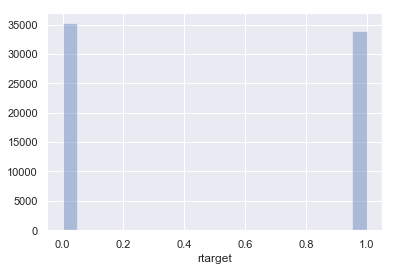

In [114]:
sns.distplot(de_testing['rtarget'], kde=False)

In [115]:
de_testing.drop_duplicates(subset=['rtarget'])['rtarget']

347814    0
155024    1
Name: rtarget, dtype: category
Categories (2, int64): [0, 1]

## Build Model

In [116]:
X_train = de_training.drop(["rtarget"], axis=1)
Y_train = de_training["rtarget"]
X_test  = de_testing.drop("rtarget", axis=1).copy()
X_training_total = training_total.drop(["rtarget"], axis=1)
Y_training_total = training_total['rtarget']
X_train.shape, Y_train.shape, X_test.shape

((276517, 38), (276517,), (69113, 38))

In [117]:
#train_acc
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

66.5

In [118]:
#test_acc
accuracy = accuracy_score(de_testing['rtarget'],Y_pred)
precision = precision_score(de_testing['rtarget'],Y_pred,average='macro')
recall = recall_score(de_testing['rtarget'],Y_pred, average='macro')

In [119]:
print('-----------'*10)
print('Total testprediction for testing')
print("accuarcy: %.4f\n" % (accuracy*100.0))
print("precision: %.4f\n" % (precision*100.0))
print("recall: %.4f\n" % (recall*100.0))

print('-----------'*10)

--------------------------------------------------------------------------------------------------------------
Total testprediction for testing
accuarcy: 66.5070

precision: 66.4980

recall: 66.4649

--------------------------------------------------------------------------------------------------------------


In [120]:
prob=logreg.predict_proba(X_training_total)

In [121]:
tt.columns

Index(['race_id', 'draw_A', 'race_class', 'race_distance', 'track_condition',
       'track', 'finishing_position', 'draw_B', 'actual_weight',
       'declared_horse_weight', 'horse_times_ca_A', 'p1_rate_A', 'p2_rate_A',
       'p3_rate_A', 'p4_rate_A', 'p5_rate_A', 'horse_times_ca_B', 'p1_rate_B',
       'p2_rate_B', 'p3_rate_B', 'p4_rate_B', 'p5_rate_B', 'jockey_times_ca_A',
       'j1_rate_A', 'j2_rate_A', 'j3_rate_A', 'j4_rate_A', 'j5_rate_A',
       'jockey_times_ca_B', 'j1_rate_B', 'j2_rate_B', 'j3_rate_B', 'j4_rate_B',
       'j5_rate_B', 'trainer_times_A', 'trainer_horses_A', 'greatjob_times_A',
       'trainer_times_B', 'trainer_horses_B', 'greatjob_times_B', 'rtarget'],
      dtype='object')

In [122]:
#drop_duplicates去重
win_draw=tt.loc[tt['finishing_position']==1,['race_id','draw_A']].drop_duplicates()

In [123]:
win_draw

,race_id,draw_A
0,2014-001,1
13,2014-001,13
26,2014-001,3
182,2014-010,13
195,2014-010,3
208,2014-010,6
364,2014-002,8
377,2014-002,10
390,2014-002,7
546,2014-003,11


In [124]:
prob = pd.DataFrame(prob,columns=['A1','A2'])

In [125]:
prob

,A1,A2
0,0.528989,0.471011
1,0.409174,0.590826
2,0.332563,0.667437
3,0.520186,0.479814
4,0.762062,0.237938
5,0.871880,0.128120
6,0.727771,0.272229
7,0.693174,0.306826
8,0.883508,0.116492
9,0.699985,0.300015


In [126]:
tt = tt.loc[:,['race_id','draw_A','draw_B']].reset_index()

In [127]:
tt

,index,race_id,draw_A,draw_B
0,0,2014-001,1,13
1,1,2014-001,1,3
2,2,2014-001,1,2
3,3,2014-001,1,9
4,4,2014-001,1,11
5,5,2014-001,1,12
6,6,2014-001,1,8
7,7,2014-001,1,6
8,8,2014-001,1,7
9,9,2014-001,1,4


In [128]:
Tp=pd.concat( [tt, prob], axis=1 )

In [129]:
Tp['A3']=Tp['A1']-Tp['A2']

In [134]:
Tp.loc[(Tp['race_id']=='2014-001') & (Tp['draw_A']=='2'),:]

,index,race_id,draw_A,draw_B,A1,A2,A3
36,39,2014-001,2,1,0.693546,0.306454,0.387092
37,40,2014-001,2,13,0.702516,0.297484,0.405032
38,41,2014-001,2,3,0.592869,0.407131,0.185737
39,42,2014-001,2,9,0.695257,0.304743,0.390514
40,43,2014-001,2,11,0.870708,0.129292,0.741416
41,44,2014-001,2,12,0.934680,0.065320,0.869360
42,45,2014-001,2,8,0.849179,0.150821,0.698357
43,46,2014-001,2,6,0.828843,0.171157,0.657687
44,47,2014-001,2,7,0.941039,0.058961,0.882077
45,48,2014-001,2,4,0.830679,0.169321,0.661358


In [139]:
sum_prob=pd.DataFrame({'sum_prob':Tp.groupby(['race_id','draw_A'])['A3'].sum()}).reset_index()

In [144]:
sum_prob.loc[sum_prob['race_id']=='2014-004',:]

,race_id,draw_A,sum_prob
38,2014-004,1,-3.466496
39,2014-004,10,0.762120
40,2014-004,11,-1.937131
41,2014-004,12,1.049994
42,2014-004,13,-2.755434
43,2014-004,14,-5.761114
44,2014-004,2,3.879070
45,2014-004,3,0.119957
46,2014-004,4,-2.860717
47,2014-004,5,7.139896


In [145]:
rank=(Tp.groupby(['race_id','draw_A'])['A3'].rank(method='average', ascending=False, na_option='keep', pct=False, axis=0)).to_frame()

In [146]:
rank.columns=['rank']

In [147]:
rank

,rank
0,9.0
1,11.0
2,12.0
3,10.0
4,4.0
5,3.0
6,5.0
7,7.0
8,2.0
9,6.0


In [148]:
Tp=pd.concat([Tp,rank],axis=1) 

In [149]:
Tp

,index,race_id,draw_A,draw_B,A1,A2,A3,rank
0,0,2014-001,1,13,0.528989,0.471011,0.057979,9.0
1,1,2014-001,1,3,0.409174,0.590826,-0.181653,11.0
2,2,2014-001,1,2,0.332563,0.667437,-0.334875,12.0
3,3,2014-001,1,9,0.520186,0.479814,0.040372,10.0
4,4,2014-001,1,11,0.762062,0.237938,0.524123,4.0
5,5,2014-001,1,12,0.871880,0.128120,0.743761,3.0
6,6,2014-001,1,8,0.727771,0.272229,0.455541,5.0
7,7,2014-001,1,6,0.693174,0.306826,0.386349,7.0
8,8,2014-001,1,7,0.883508,0.116492,0.767015,2.0
9,9,2014-001,1,4,0.699985,0.300015,0.399971,6.0


In [150]:
Tp=Tp.loc[Tp['rank']<=3,:]

In [151]:
Tp.groupby(['race_id','draw_B'])['index'].count()

race_id   draw_B
2014-001  11         3
          12        12
          5         12
          7         12
2014-002  1          2
          5         13
          6         13
          8          1
          9         13
2014-003  10        10
          7         10
          8         10
          9          3
2014-004  1         13
          13         7
          14        13
          4          9
2014-005  14        13
          3          3
          4         13
          7         13
2014-006  10         1
          11        12
          13         2
          3         12
          6         12
2014-007  1         13
          11         1
          13        13
          14        13
                    ..
2016-800  7         13
          8          3
2016-801  14        12
          6         13
          8          4
          9         13
2016-802  11        12
          14        12
          3          3
          6         12
2016-803  10        13
          12     